# Insurance Claim Fraud Detection

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables
1. months_as_customer: Number of months of patronage
2. age: the length of time a customer has lived or a thing has existed
3. policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4. policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5. policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6. policy_csl: is basically Combined Single Limit
7. policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8. policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9. umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10. insured_zip: It is the zip code where the insurance was made
11. insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12. insured_education_level: This refers to the Level of education of the customer
13. insured_occupation: This refers Occupation of the customer
14. insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15. insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16. capital-gains: This refers to profit accrued due to insurance premium
17. capital-loss: This refers to the losses incurred due to insurance claims
18. incident_date: This refers to the date which claims where made by customers
19. incident_type: This refers to the type of claim/vehicle damage made by customer
20. collision_type: This refers to the area of damage on the vehicle
21. incident_severity: This refers to the extent/level of damage
22. authorities_contacted: This refers to the government agencies that were contacted after damage
23. incident_state: This refers to the state at which the accident happened
24. incident_city: This refers to the city at which the accident happened
25. 1ncident_location: This refers to the location at which the accident happened
26. incident_hour_of_the_day: The period of the day which accident took place
27. number_of_vehicles_involved: This refers to number of vehicles involved the accident
28. property_damage: This refers to whether property was damaged or not
29. bodily_injuries: This refers to injuries sustained
30. witnesses: This refers to the number of witnesses involved
31. police_report_available: This refers to whether the report on damage was documented or not
32. total_claim_amount: This refers to the financial implications involved in claims
33. injury_claim: This refers to physical injuries sustained
34. property_claim: This refers to property damages during incident
35. vehicle_claim: This refers to property damages during incident
36. auto_make: This refers to the make of the vehicle
37. auto_model: This refers to the model of the vehicle
38. auto_year: This refers to the year which the vehicle was manufactured
39. _c39:
40. fraud_reported

## Import Necessary Libaraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import the Dataset

In [2]:
# Import csv file to DataFrame
df = pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
print('No of rows : ',df.shape[0])
print('No. of columns : ',df.shape[1])
pd.set_option('display.max_columns',None)

df.head()

No of rows :  1000
No. of columns :  40


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# Checking the columns in the dataset
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
# Checking names, count and dtype of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We seen there are 40 columns in which float has 2, int64 has 17 and object has 21.

In [6]:
# Checking the duplicates  values in the dataset
df.duplicated().sum()

0

We see there are not any duplicates.

In [7]:
# Let check if any whitespace, 'NA' or '-', qustion mark exist in dataset.
df.isin([' ','-','?']).sum().any()

True

we find whitespace, 'NA' or '-', qustion mark let's check one by one.

In [8]:
# Check whitespace
df.isin([' ']).sum().sum()

0

In [9]:
# Check '-'
df.isin(['-']).sum().sum()

0

In [10]:
# Check ?
df.isin(['?']).sum().sum()

881

We found question marks in the dataset.

In [11]:
df.isin(['?']).sum().sum()

881

In [12]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [13]:
# Let replace '?' with np.NaN
df = df.replace('?',np.NaN)

In [14]:
# Checking the missing values in the dataset
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

* property_damage',authorities_contacted,'police_report_available','collision_type' contain missing values.
* _c39 columns with 100 % null value. We gone drop it.
* Other missing value feature are categorical in nature. We gone impute them with mode of that particular category.

In [15]:
# Filling missing values 

df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [16]:
# Droping _c39 column it contains all missing values

df = df.drop(columns = ['_c39'])

In [17]:
# Checking missing values again
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There are no missing values in the dataset.

In [18]:
# Checking the unique values in the dataset
df.nunique().to_frame('No of unique values')

,No of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [19]:
# Checking the value count of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64
**************************************************
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64
**************************************************
policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64
**************************************************
policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992 

### The bodily_injuries, number_of_vehicles_involved witness columns has datatypes int but it is a categorical column.

**umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies We found it has lot of 0. and also one -100000 how can any existing limits  in negative. so we remove it behalf of our knowledge.**

**witnesses is a categorical columns**

In [20]:
df['umbrella_limit'].value_counts()

umbrella_limit
 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: count, dtype: int64

In [21]:
df[df['umbrella_limit'].isin([-1000000])]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,MALE,Associate,machine-op-inspct,kayaking,wife,0,0,29-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Arlington,3936 Tree Drive,13,1,YES,0,1,NO,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [22]:
# Remove row which has -1000000 value
df = df.drop(index=290,axis=1)

**In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype. We will split this column into two CSL columns for person and accident.**

Combined single limit (CSL):
 CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.

In [23]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

df.shape

(999, 40)

**We also see columns auto_year use of this column we find vehicle age and make a new columns.**

In [24]:
df['auto_year'].sort_values(ascending=True)

123    1995
804    1995
65     1995
204    1995
728    1995
       ... 
87     2015
398    2015
943    2015
17     2015
735    2015
Name: auto_year, Length: 999, dtype: int64

In [25]:
max(df['auto_year'])

2015

In [26]:
# The age of the vehicle based on the year value
df['vehicle_age'] = 2018 - df['auto_year']  
df['vehicle_age'].head(5)

0    14
1    11
2    11
3     4
4     9
Name: vehicle_age, dtype: int64

In [27]:
# Droping unnecessary columns
  
df = df.drop(columns=['policy_number', 
                          'insured_zip', 
                          'policy_bind_date', 
                          'incident_date', 
                          'incident_location', 
                          'auto_year', 
                          'incident_hour_of_the_day'],axis=1)    

In [28]:
# Sparate categorical and numerical columns

# Categorical columns
categorical = []

for i in df.columns:
    if df[i].dtypes == 'object':
        categorical.append(i)

print('Categorical columns ',categorical)
        
# Numerical columns
numerical = []

for i in df.columns:
    if df[i].dtypes != 'object':
        numerical.append(i)
        
print('\nNumerical columns ',numerical)

Categorical columns  ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

Numerical columns  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'vehicle_age']


The bodily_injuries, number_of_vehicles_involved witness columns has datatypes int but it is a categorical column. So we exchange those columns.

In [29]:
len(categorical),len(numerical)

(19, 15)

In [30]:
# Exchange depend it form
l = ['number_of_vehicles_involved','bodily_injuries','witnesses']

categorical.extend( ['number_of_vehicles_involved','bodily_injuries','witnesses'])

numerical.remove('number_of_vehicles_involved')
numerical.remove('bodily_injuries')
numerical.remove('witnesses')

len(categorical),len(numerical)

(22, 12)

## Description of Dataset

In [31]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.873874,38.944945,1136.636637,1256.323934,1.103103e+06,25151.251251,-26820.520521,1.839840,0.992993,1.487487,52720.500501,7432.292292,7389.839840,37898.368368,12.887888
std,115.142928,9.144354,611.839681,244.275843,2.297594e+06,27874.792269,28105.366259,1.019044,0.819936,1.111785,26382.199299,4883.266266,4817.316312,18870.924206,6.011966
min,0.000000,19.000000,500.000000,433.330000,0.000000e+00,0.000000,-111100.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,3.000000
25%,115.500000,32.000000,500.000000,1089.185000,0.000000e+00,0.000000,-51500.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,8.000000
50%,199.000000,38.000000,1000.000000,1257.040000,0.000000e+00,0.000000,-24100.000000,1.000000,1.000000,1.000000,57970.000000,6770.000000,6750.000000,42080.000000,13.000000
75%,276.000000,44.000000,2000.000000,1415.710000,0.000000e+00,51050.000000,0.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,18.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,23.000000


From the above description we can oberve the following :-
 1. The counts of all the columns are same which means there are no missing values in the dataset.
 2. The values and the median values has different but no much difference.
 3. By summarizing the data we can osberve there are huge differences between 75% and max hence there are outliers present in the data.
 4. We can also notice the Standard deviation, min 25% percentile values.
 5. Some columns has lot of zeros values.

## Data Visualization

### Univariate Analysis

fraud_reported
N    752
Y    247
Name: count, dtype: int64


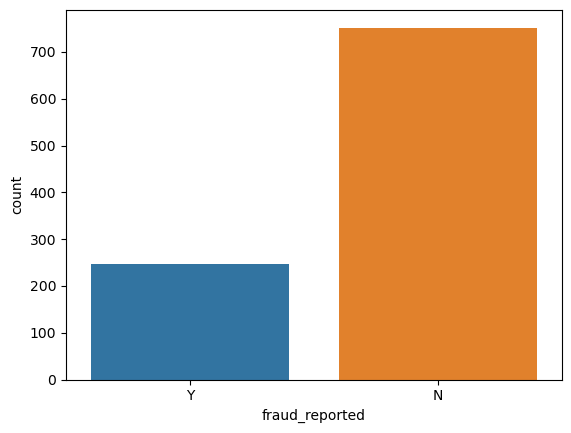

In [32]:
# Visualize the target columns
print(df['fraud_reported'].value_counts())

sns.countplot(x = df['fraud_reported'])
plt.show()

We can observe the count of "Not fraud" are high compared to the count of "Yes fraud" i.c ther are more number of customers who has not fraud. This leads to class imbalance issue in the data. We wll solve it by using oversampling method in later part.

policy_state
OH    351
IL    338
IN    310
Name: count, dtype: int64


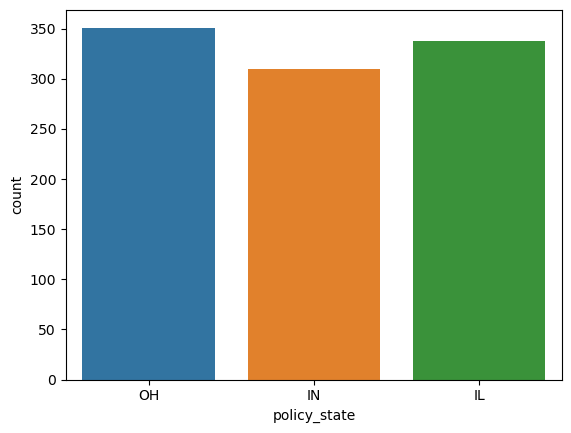

In [33]:
# Visualize the count of policy_state
print(df['policy_state'].value_counts())

sns.countplot(x=df['policy_state'])
plt.show()

Frin the above plot we can observe that the all the state has almost same count.

insured_sex
FEMALE    537
MALE      462
Name: count, dtype: int64


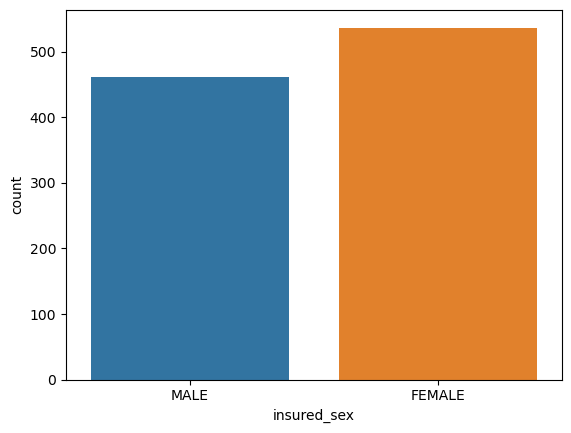

In [34]:
# Visualize the count of insured_sex
print(df['insured_sex'].value_counts())

sns.countplot(x=df['insured_sex'])
plt.show()

From the plot we can observe that total number of males and females are almost same.

insured_education_level
JD             161
High School    160
MD             144
Associate      144
Masters        143
PhD            125
College        122
Name: count, dtype: int64


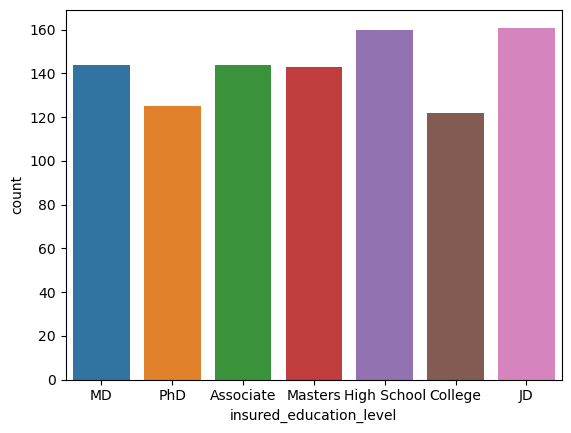

In [35]:
# Visualize the count of insured_education_level
print(df['insured_education_level'].value_counts())

sns.countplot(x=df['insured_education_level'])
plt.show()

We observe that the education level of all the customers are equal.

insured_occupation
machine-op-inspct    92
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64


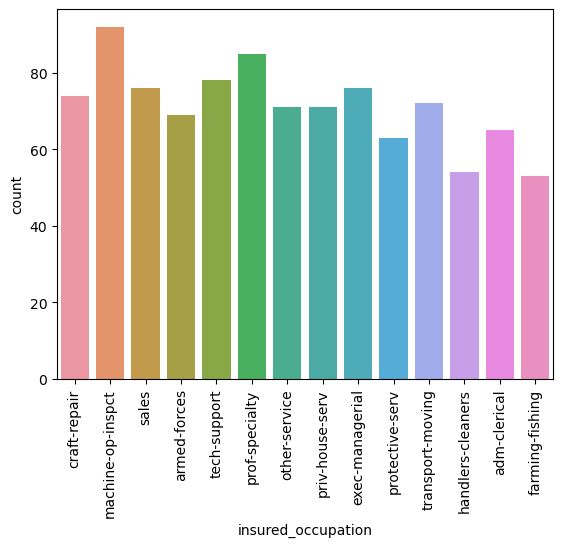

In [36]:
# Visualize the count of insured_occupation
print(df['insured_occupation'].value_counts())

sns.countplot(x=df['insured_occupation'])
plt.xticks(rotation=90)
plt.show()

We can all the occupation has almost equal number of count but machine-op-inspct and prof-specialty has high.

insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          53
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: count, dtype: int64


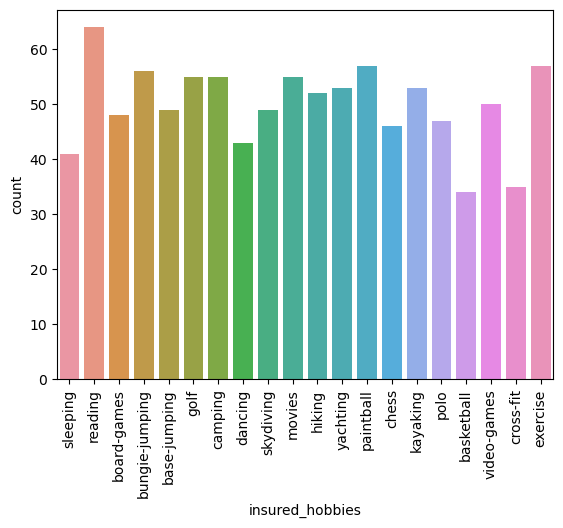

In [37]:
# Visualize the count of insured_hobbies
print(df['insured_hobbies'].value_counts())

sns.countplot(x=df['insured_hobbies'])
plt.xticks(rotation=90)
plt.show()

We observe that most of the cusomters hobbies has reading but other hobbies not much difference.

insured_relationship
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              154
unmarried         141
Name: count, dtype: int64


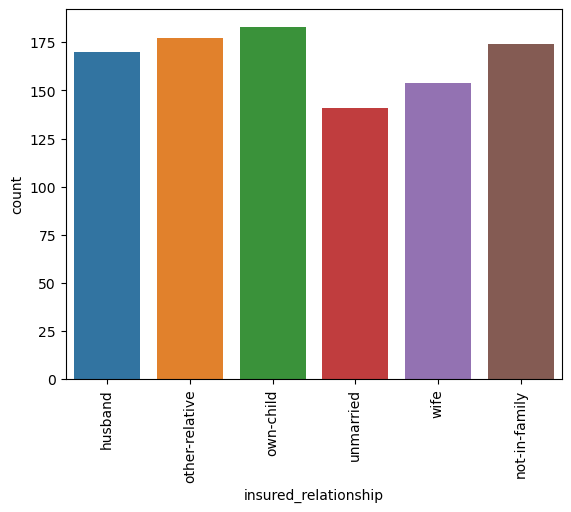

In [38]:
# Visualize the count of insured_relationship
print(df['insured_relationship'].value_counts())

sns.countplot(x=df['insured_relationship'])
plt.xticks(rotation=90)
plt.show()

We observe that in relationship columns are almost same number of cusotmers.

incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    402
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64


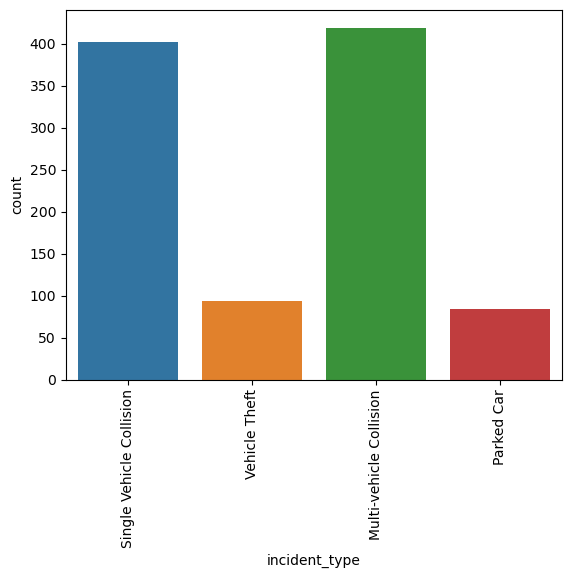

In [39]:
# Visualize the count of incident_type
print(df['incident_type'].value_counts())

sns.countplot(x=df['incident_type'])
plt.xticks(rotation=90)
plt.show()

We observe that the Multi-vehicle collision and single Vehcile collision has high count. 

collision_type
Rear Collision     470
Side Collision     275
Front Collision    254
Name: count, dtype: int64


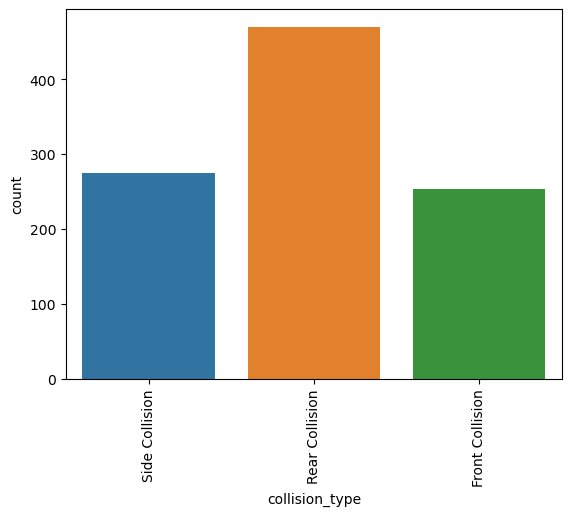

In [40]:
# Visualize the count of collision_type
print(df['collision_type'].value_counts())

sns.countplot(x=df['collision_type'])
plt.xticks(rotation=90)
plt.show()

We observe that Rear collision has high count.

incident_severity
Minor Damage      354
Total Loss        280
Major Damage      275
Trivial Damage     90
Name: count, dtype: int64


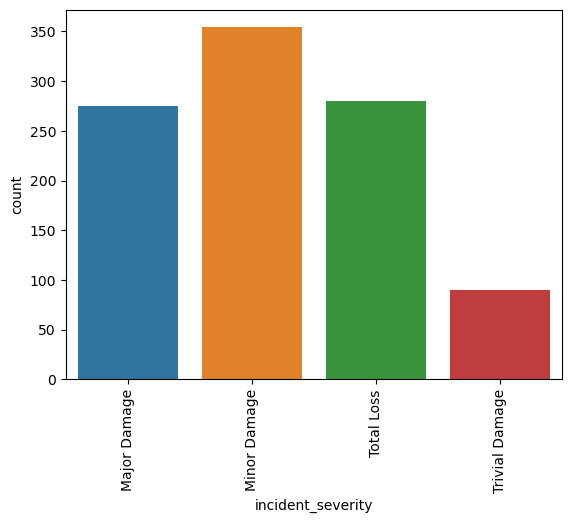

In [41]:
# Visualize the count of incident_severity
print(df['incident_severity'].value_counts())

sns.countplot(x=df['incident_severity'])
plt.xticks(rotation=90)
plt.show()

From the above plot we can observe that Major Damage, Minor Damage and Total Loss the is high.

authorities_contacted
Police       383
Fire         223
Other        198
Ambulance    195
Name: count, dtype: int64


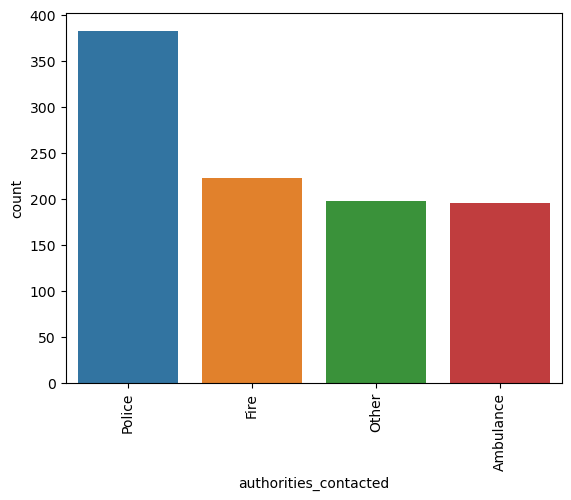

In [42]:
# Visualize the count of authorities_contacted
print(df['authorities_contacted'].value_counts())

sns.countplot(x=df['authorities_contacted'])
plt.xticks(rotation=90)
plt.show()

We obseve that count contacted to police is very high

incident_state
NY    262
SC    248
WV    217
VA    110
NC    109
PA     30
OH     23
Name: count, dtype: int64


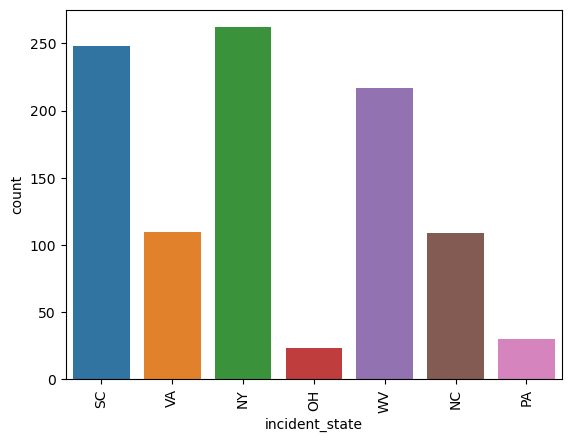

In [43]:
# Visualize the count of incident_state
print(df['incident_state'].value_counts())

sns.countplot(x=df['incident_state'])
plt.xticks(rotation=90)
plt.show()

We observe that the count of SC,Ny state has high count and OH, PA has very less count.

incident_city
Springfield    157
Arlington      151
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: count, dtype: int64


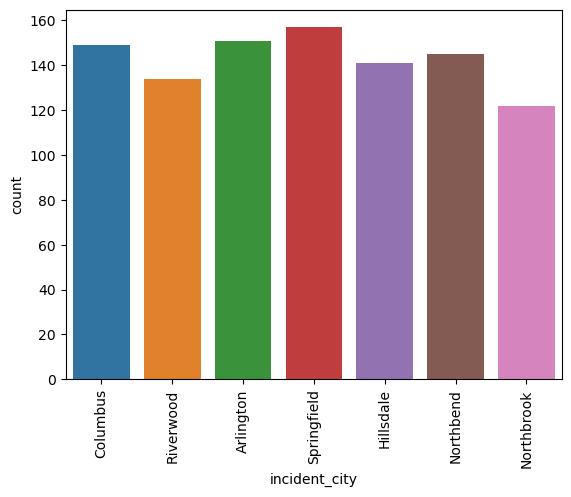

In [44]:
# Visualize the count of incident_city
print(df['incident_city'].value_counts())

sns.countplot(x=df['incident_city'])
plt.xticks(rotation=90)
plt.show()

The count of all the city has almost equal no so much difference.

property_damage
NO     698
YES    301
Name: count, dtype: int64


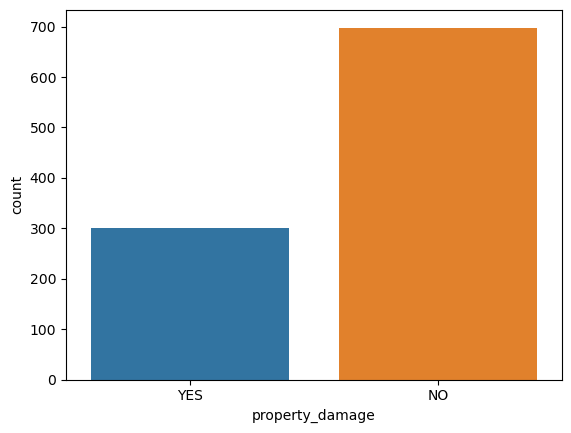

In [45]:
# Visualize the count of property_damage
print(df['property_damage'].value_counts())

sns.countplot(x=df['property_damage'])
plt.show()

Here The count of No s high to compared to Yes which mean the only few incidnet has damage property.

police_report_available
NO     685
YES    314
Name: count, dtype: int64


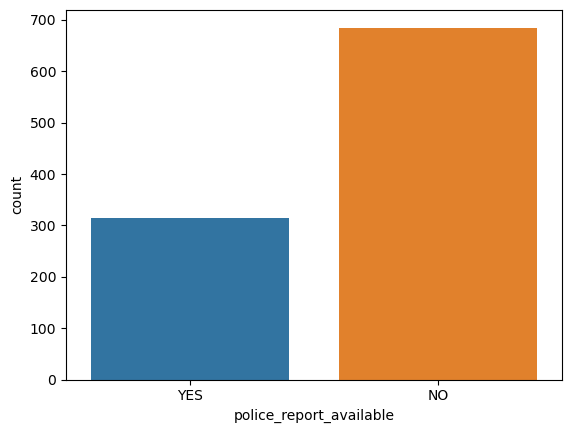

In [46]:
# Visualize the count of police_report_available
print(df['police_report_available'].value_counts())

sns.countplot(x=df['police_report_available'])
plt.show()

The count of No is high than Yes it mean most of people has not report of their accident.

auto_make
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     75
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: count, dtype: int64


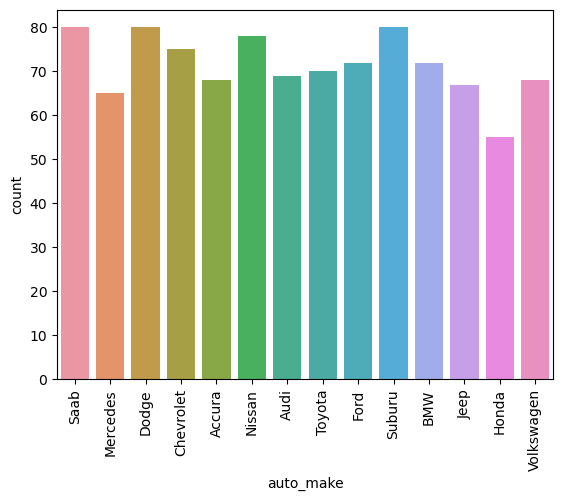

In [47]:
# Visualize the count of auto_make
print(df['auto_make'].value_counts())

sns.countplot(x=df['auto_make'])
plt.xticks(rotation=90)
plt.show()

We can observe that all the count has almost equal.

auto_model
RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            29
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: count, dtype: int64


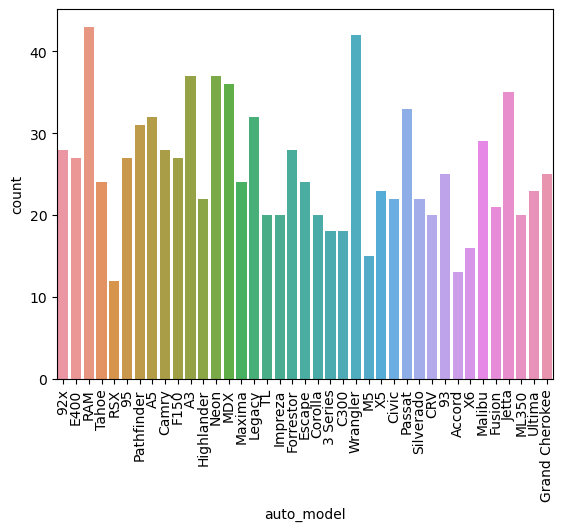

In [48]:
# Visualize the count of auto_model
print(df['auto_model'].value_counts())

sns.countplot(x=df['auto_model'])
plt.xticks(rotation=90)
plt.show()

CSL_Personal
250    351
100    348
500    300
Name: count, dtype: int64


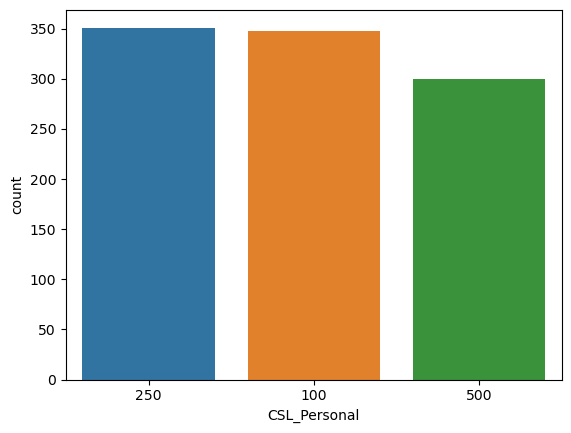

In [49]:
# Visualize the count of CSL_Personal
print(df['CSL_Personal'].value_counts())

sns.countplot(x=df['CSL_Personal'])
plt.show()

We can observe that all the count has almost equal.

CSL_Personal
250    351
100    348
500    300
Name: count, dtype: int64


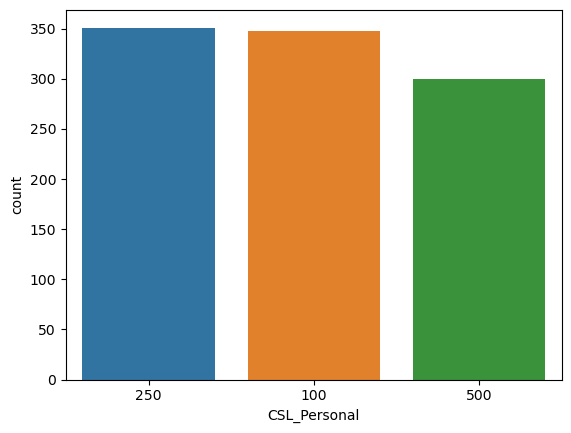

In [50]:
# Visualize the count of CSL_Personal
print(df['CSL_Personal'].value_counts())

sns.countplot(x=df['CSL_Personal'])
plt.show()

We obseve that the are almost equal.

CSL_Accidental
500     351
300     348
1000    300
Name: count, dtype: int64


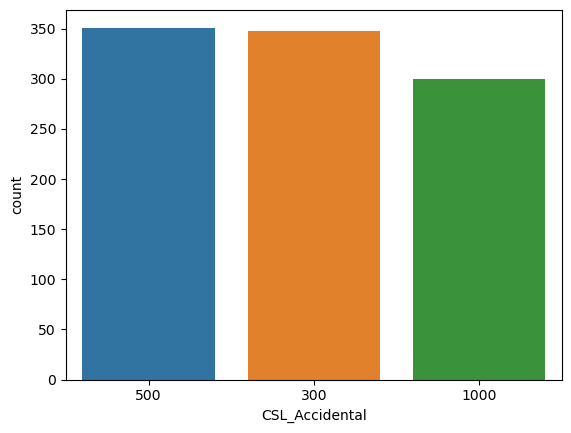

In [51]:
# Visualize the count of CSL_Accidental
print(df['CSL_Accidental'].value_counts())

sns.countplot(x=df['CSL_Accidental'])
plt.show()

We obseve that the are almost equal.

number_of_vehicles_involved
1    580
3    358
4     31
2     30
Name: count, dtype: int64


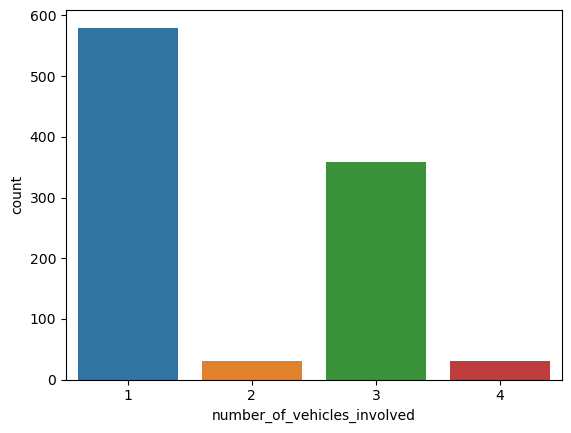

In [52]:
# Visualize the count of number_of_vehicles_involved
print(df['number_of_vehicles_involved'].value_counts())

sns.countplot(x=df['number_of_vehicles_involved'])
plt.show()

The count is very high of one vehicles involved and three involved.

bodily_injuries
0    339
2    332
1    328
Name: count, dtype: int64


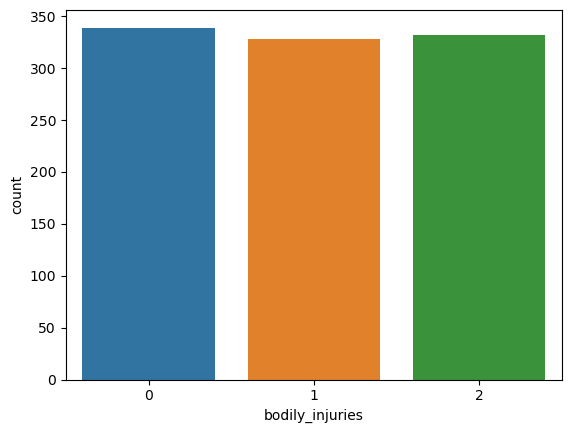

In [53]:
# Visualize the count of bodily_injuries
print(df['bodily_injuries'].value_counts())

sns.countplot(x=df['bodily_injuries'])
plt.show()

The all the count is almost same.

witnesses
1    257
2    250
0    249
3    243
Name: count, dtype: int64


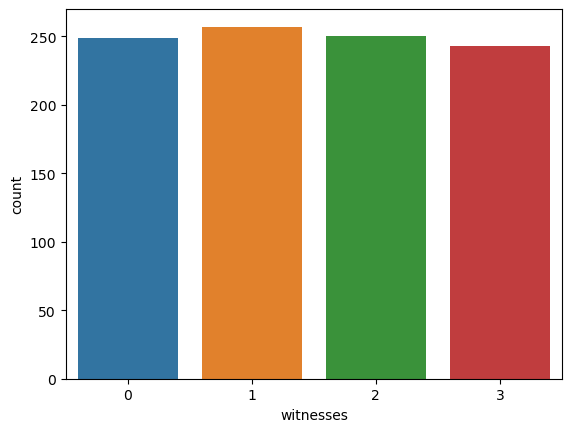

In [54]:
# Visualize the count of witnesses
print(df['witnesses'].value_counts())

sns.countplot(x=df['witnesses'])
plt.show()

The all the count is almost same.

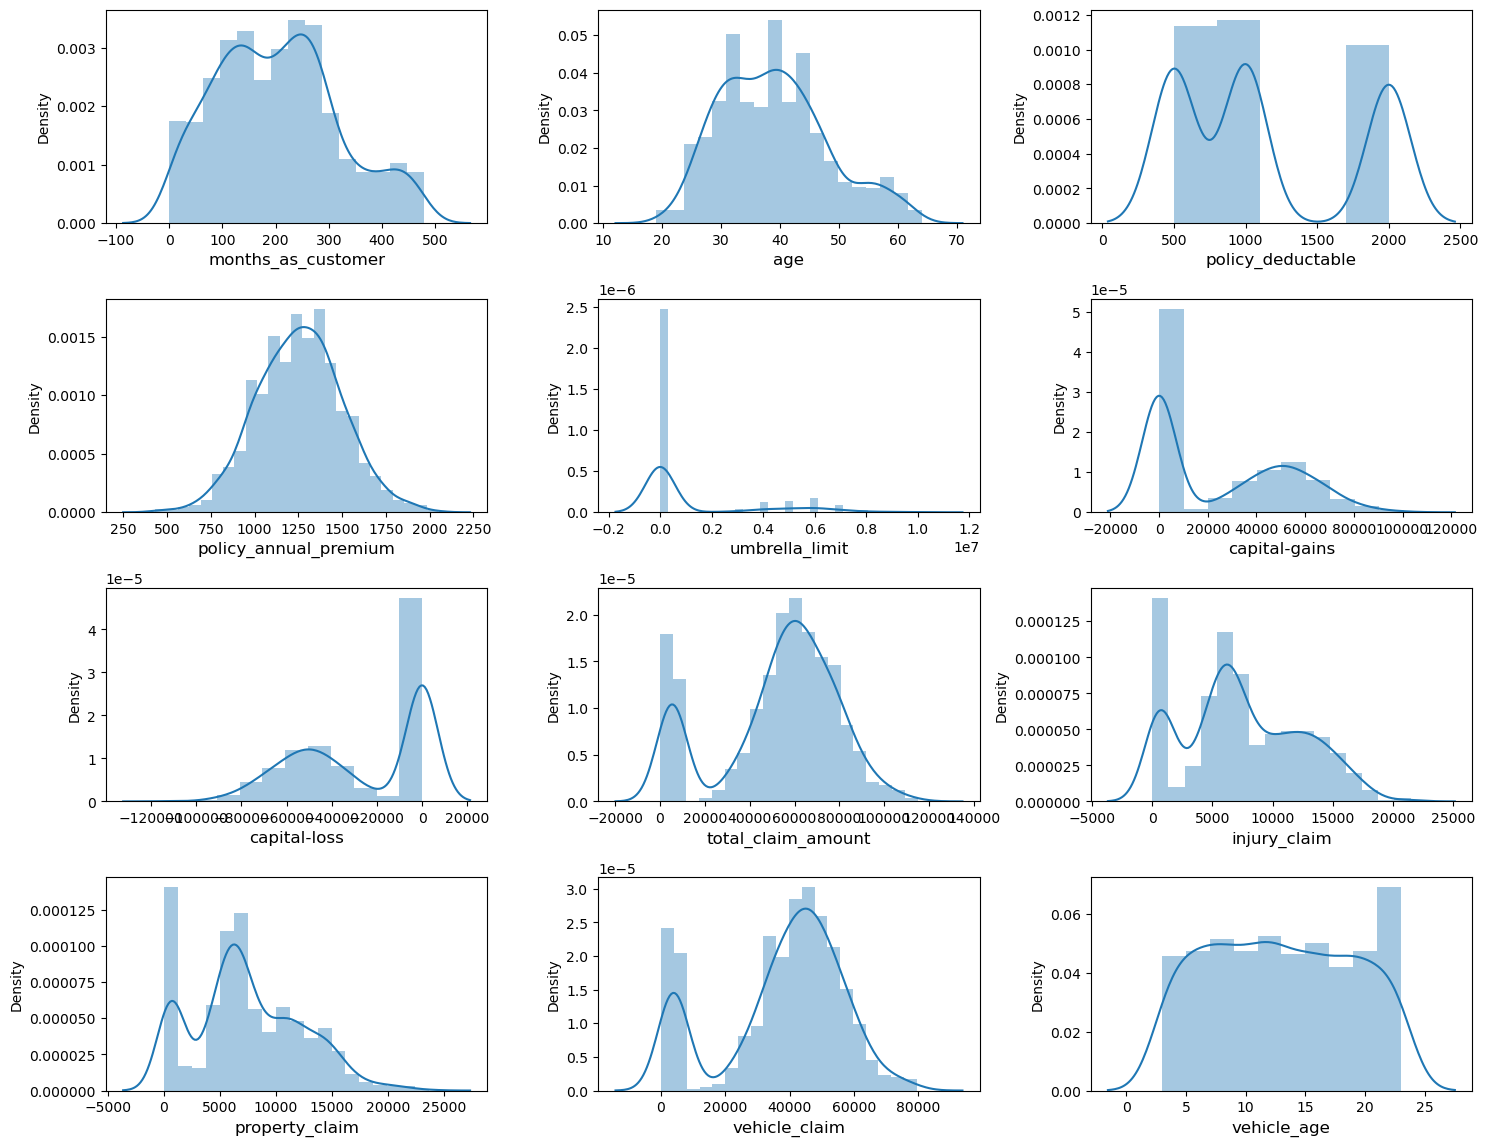

In [55]:
# Let's check how the data has been distributed in numerical columns
plt.figure(figsize=(15,14),facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data almost looks normal but umbrella_limit,capital-gains columns has skewed to right and capital-loss	in has left skewed.  

### Bivariate Analysis

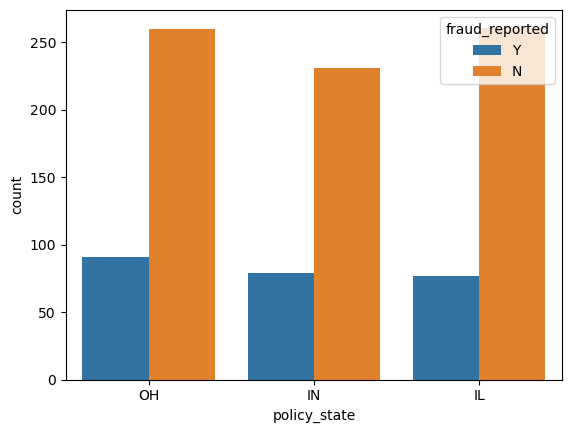

In [56]:
# Comparing all the policy_state column vs target variable
sns.countplot(x= 'policy_state', hue='fraud_reported',data=df)
plt.show()

In the plot we can see there is no signficant difference in the policy_state, both policy_state have equal faurd level.

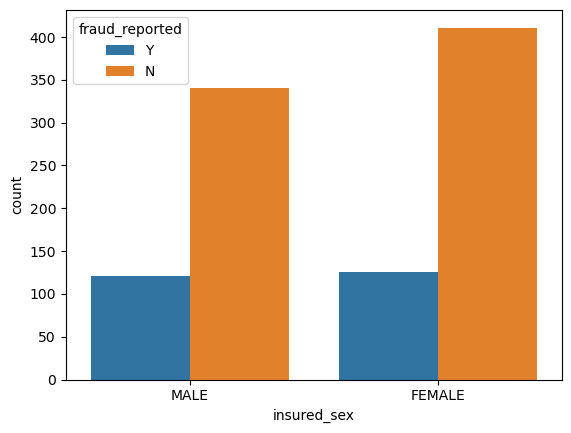

In [57]:
# Comparing all the insured_sex column vs target variable
sns.countplot(x= 'insured_sex', hue='fraud_reported',data=df)
plt.show()

In the plot we can see there is no signficant difference in the sex, both sex have equal faurd level.

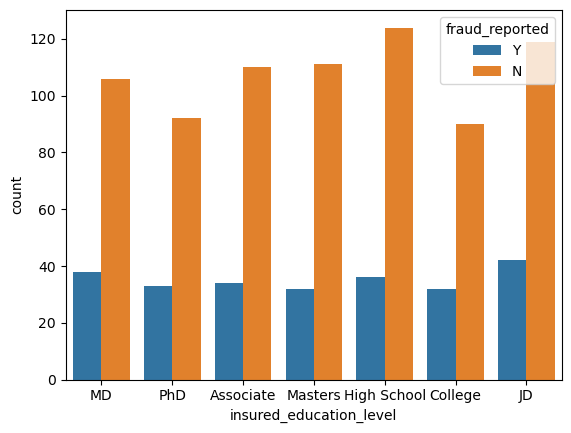

In [58]:
# Comparing all the insured_education_level column vs target variable
sns.countplot(x= 'insured_education_level', hue='fraud_reported',data=df)
plt.show()

In the plot we can see there is no signficant difference in the insured_education_level, all insured_education_level insured_education_level equal faurd level.

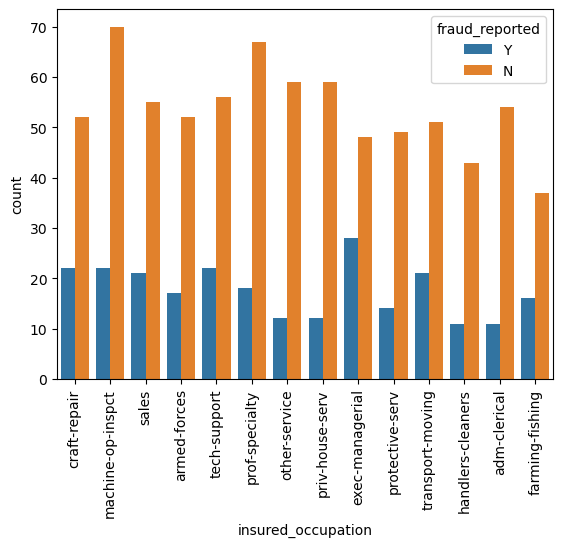

In [59]:
# Comparing all the insured_occupation column vs target variable
sns.countplot(x= 'insured_occupation', hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

In the plot we can see there is no signficant difference in the insured_occupation, all insured_occupation equal faurd level.

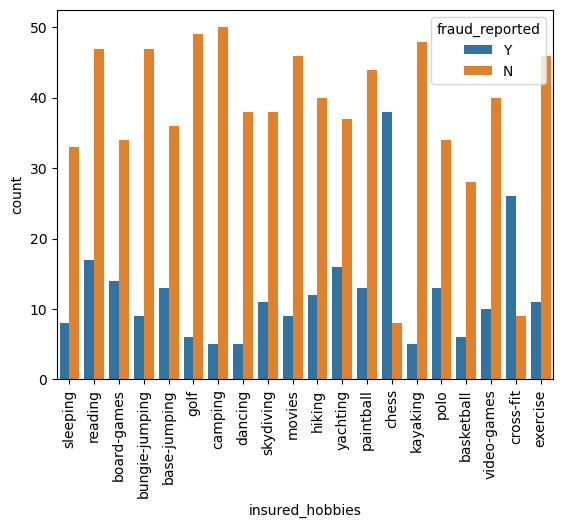

In [60]:
# Comparing all the insured_hobbies column vs target variable
sns.countplot(x= 'insured_hobbies', hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

In the plot we can see there is no signficant difference in the insured_hobbies, all insured_hobbies equal faurd level. but the hobbies is chess and cross-fit has high chance they have faurd. 

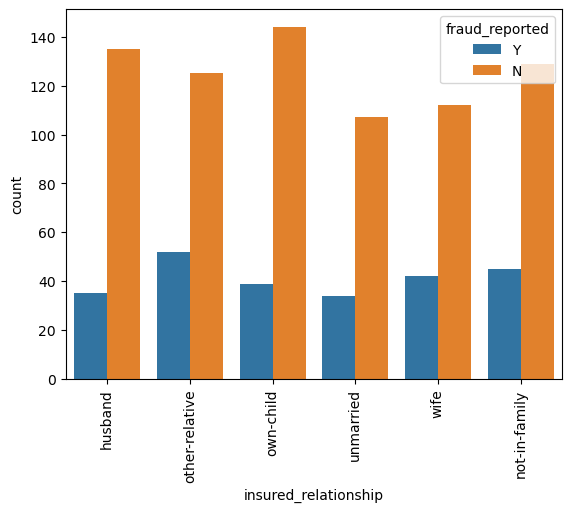

In [61]:
# Comparing all the insured_relationship column vs target variable
sns.countplot(x= 'insured_relationship', hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

In the plot we can see there is no signficant difference in the insured_relationship, all insured_relationship equal faurd level.

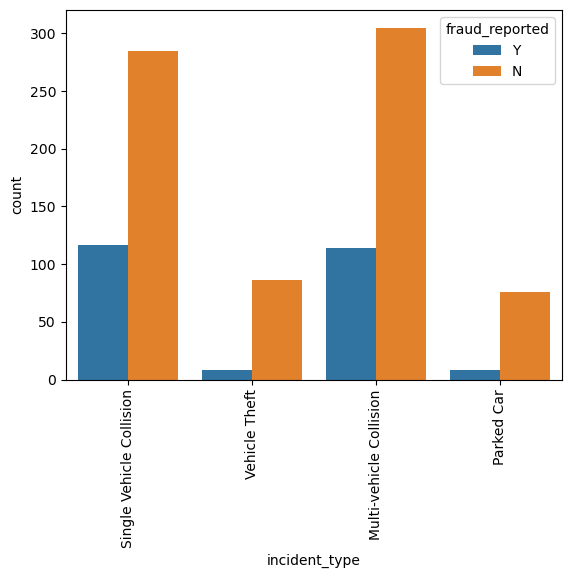

In [62]:
# Comparing all the incident_type column vs target variable
sns.countplot(x= 'incident_type', hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

In the plot we can see there is no signficant difference in the incident_type, all incident_type equal faurd level.

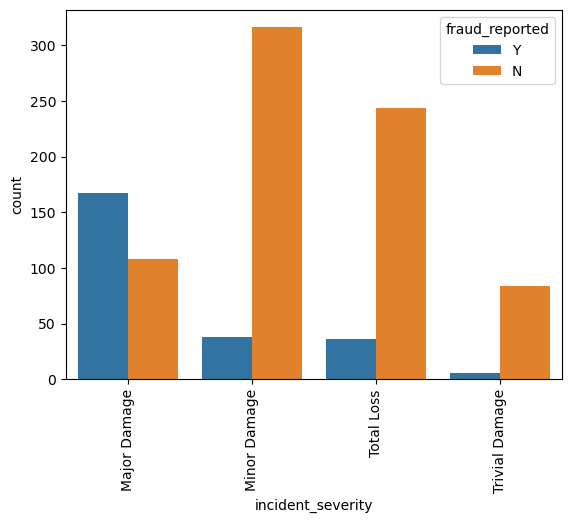

In [63]:
# Comparing all the incident_severity column vs target variable
sns.countplot(x= 'incident_severity', hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

We can observe that Major Damage has high chance then other Damage.

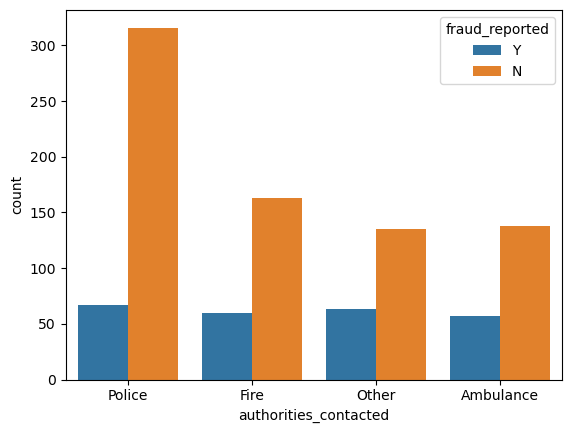

In [64]:
# Comparing all the authorities_contacted column vs target variable
sns.countplot(x= 'authorities_contacted', hue='fraud_reported',data=df)
plt.show()

In the plot we can see there is no signficant difference in the authorities_contacted, all authorities_contacted equal faurd level.

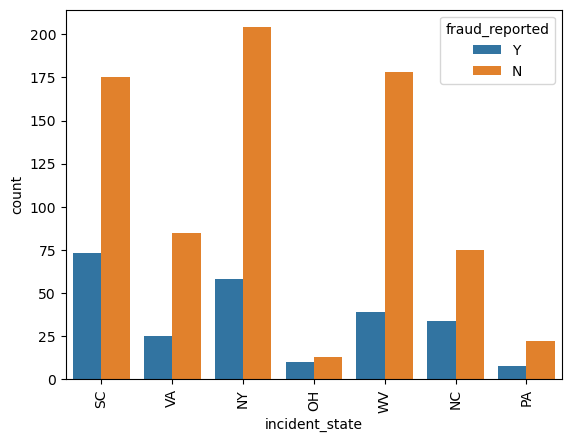

In [65]:
# Comparing all the incident_state column vs target variable
sns.countplot(x= 'incident_state', hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

In the plot we can see there is no signficant difference in the incident_state, all incident_state equal faurd level.

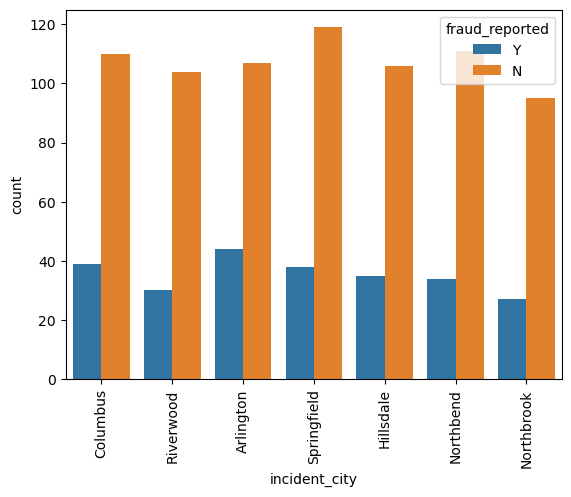

In [66]:
# Comparing all the incident_city column vs target variable
sns.countplot(x= 'incident_city', hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

In the plot we can see there is no signficant difference in the incident_city, all incident_city equal faurd level.

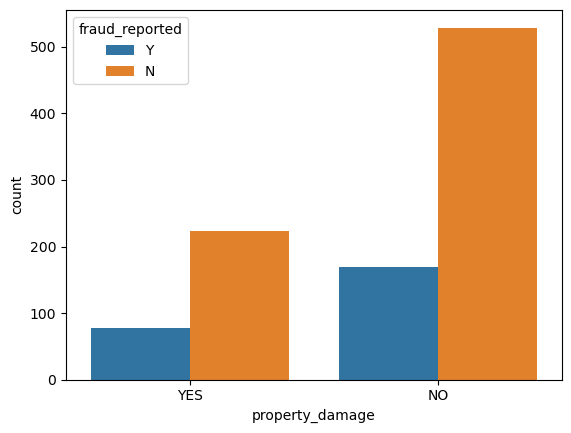

In [67]:
# Comparing all the property_damage column vs target variable
sns.countplot(x= 'property_damage', hue='fraud_reported',data=df)
plt.show()

In the plot we can see there is no signficant difference in the property_damage, both property_damage equal faurd level.

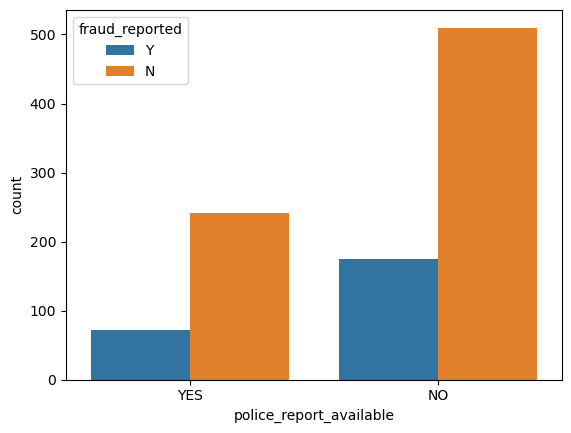

In [68]:
# Comparing all the police_report_available column vs target variable
sns.countplot(x= 'police_report_available', hue='fraud_reported',data=df)
plt.show()

In the plot we can see there is no signficant difference in the property_damage, both property_damage equal faurd level.

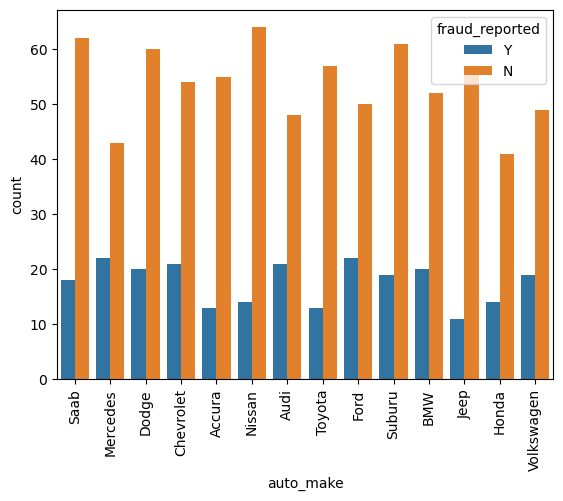

In [69]:
# Comparing all the auto_make column vs target variable
sns.countplot(x= 'auto_make', hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

In the plot we can see there is no signficant difference in the auto_make, all auto_make equal faurd level.

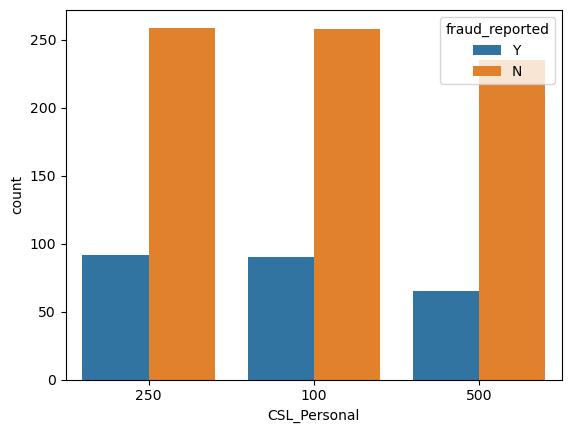

In [70]:
# Comparing all the CSL_Personal column vs target variable
sns.countplot(x= 'CSL_Personal', hue='fraud_reported',data=df)
plt.show()

In the plot we can see there is no signficant difference in the CSL_Personal, all CSL_Personal equal faurd level.

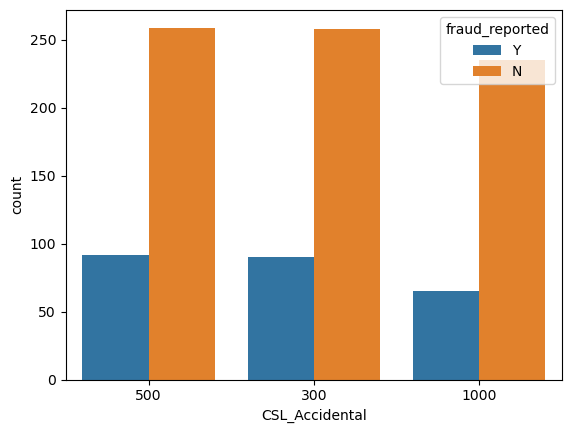

In [71]:
# Comparing all the CSL_Accidental column vs target variable
sns.countplot(x= 'CSL_Accidental', hue='fraud_reported',data=df)
plt.show()

In the plot we can see there is no signficant difference in the CSL_Accidental, all CSL_Accidental equal faurd level.

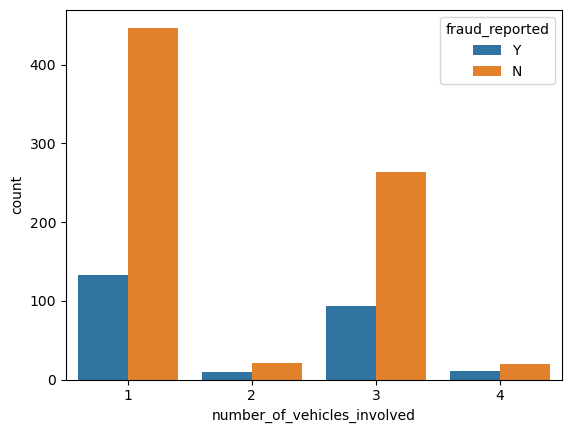

In [72]:
# Comparing all the number_of_vehicles_involved column vs target variable
sns.countplot(x= 'number_of_vehicles_involved', hue='fraud_reported',data=df)
plt.show()

In the plot we can see there is no signficant difference in the number_of_vehicles_involved, all number_of_vehicles_involved equal faurd level.

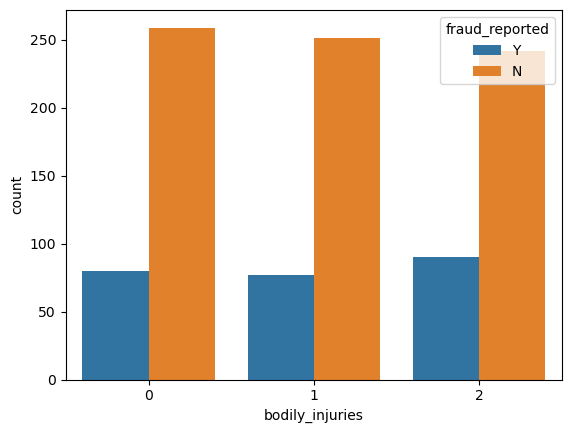

In [73]:
# Comparing all the bodily_injuries column vs target variable
sns.countplot(x= 'bodily_injuries', hue='fraud_reported',data=df)
plt.show()

In the plot we can see there is no signficant difference in the bodily_injuries, all bodily_injuries equal faurd level.

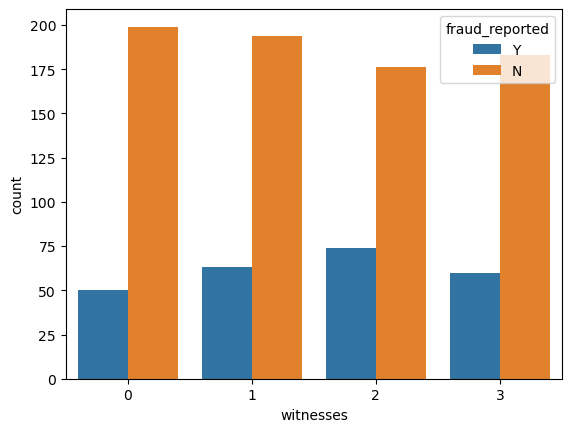

In [74]:
# Comparing all the witnesses column vs target variable
sns.countplot(x= 'witnesses', hue='fraud_reported',data=df)
plt.show()

In the plot we can see there is no signficant difference in the witnesses, all witnesses equal faurd level.

## Identify Outliers

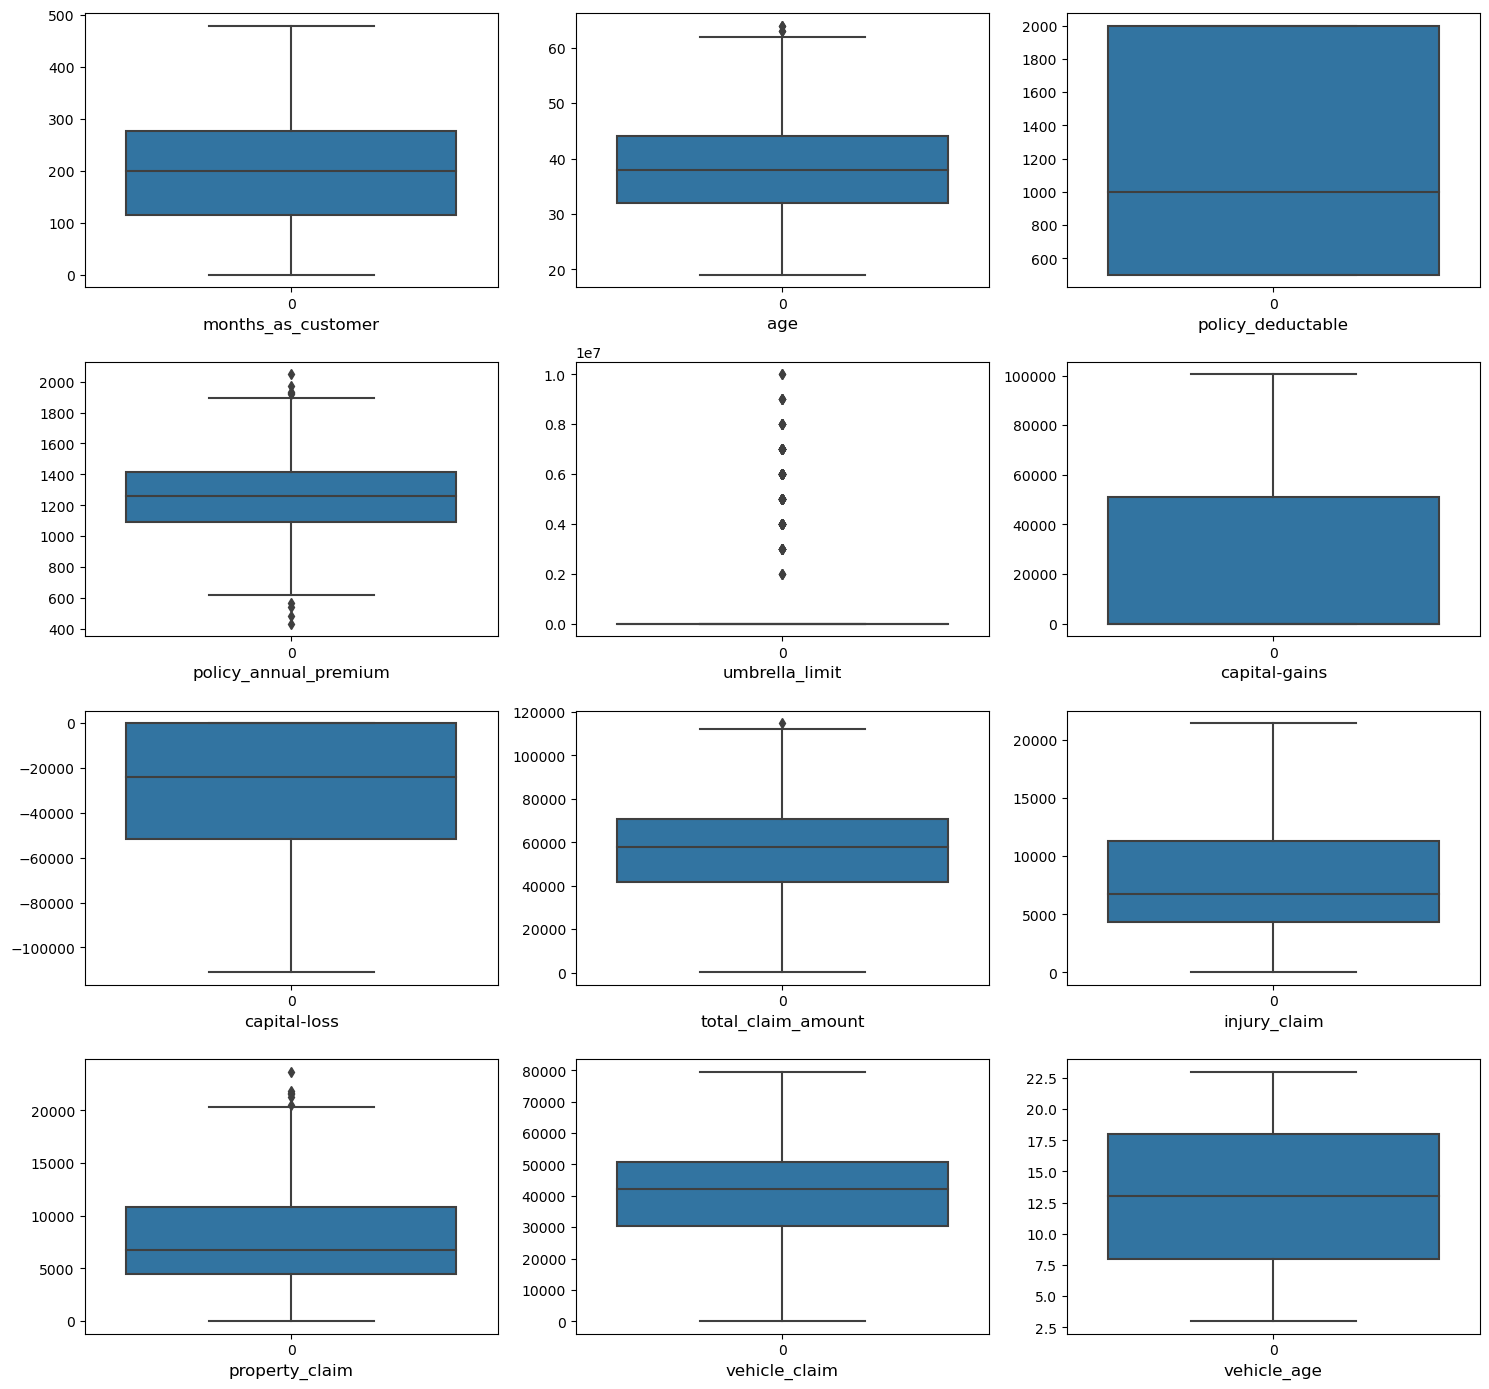

In [75]:
# Checking the outliers using boxplot
plt.figure(figsize=(15,14),facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

These 'age','policy_annual_premium','umbrella_limit','total_claim_amount','injury_claim',
'property_claim' columns has outliers so we need to remove outliers. umbrella_limit has lot of 0.

## Outliers Detection and removel

### Checking outliers using zscore method

In [76]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore

df_feature = df[['age','policy_annual_premium','total_claim_amount','injury_claim','property_claim']]

z = np.abs(zscore(df_feature))            # Apply the formula and get the scaled data

df1 = df[(z<3).all(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df1.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Old Data Frame -  999
New Data Frame -  995

Data Loss Percentage After removing outliers with zscore method -
  0.40040040040040037


### Checking outliers using IQR method

In [77]:
# 1st quantile 
Q1 = df_feature.quantile(0.25)

# 3rd quantile
Q3 = df_feature.quantile(0.75)

#
IQR = Q3 - Q1

df2 = df[~((df_feature<(Q1 - 1.5 * IQR)) | (df_feature>(Q3 + 1.5 * IQR))).any(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df2.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Old Data Frame -  999
New Data Frame -  979

Data Loss Percentage After removing outliers with zscore method -
  2.002002002002002


In [78]:
# reassigning the changed dataframe name to our original dataframe name
df = df1

df.shape

(995, 34)

We use zscore method because its Loss less data then IQR method.

**Checking how the data has been distributed of numerical columns.**

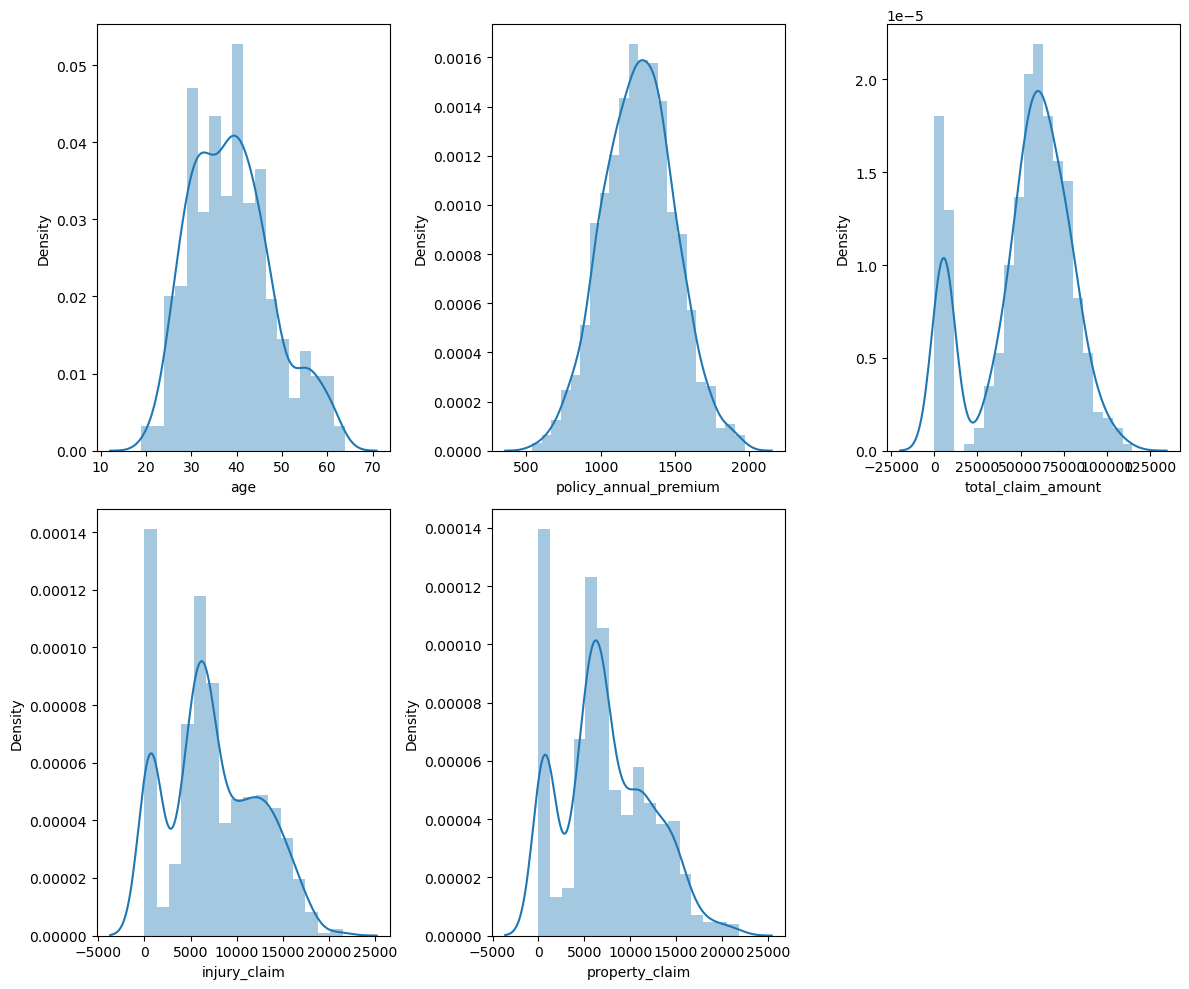

In [79]:
# Checking the distribution of the numerical columns and skewnes
plt.figure(figsize=(12,10),facecolor='white')
plotnumber = 1

for col in df_feature:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

The columns has skewness in te data. So we can remove skewness.

## Checking the skewness

In [80]:
df[numerical].skew()

months_as_customer       0.361440
age                      0.475328
policy_deductable        0.471759
policy_annual_premium    0.033009
umbrella_limit           1.799653
capital-gains            0.477212
capital-loss            -0.391351
total_claim_amount      -0.594557
injury_claim             0.268546
property_claim           0.356866
vehicle_claim           -0.621296
vehicle_age              0.050501
dtype: float64

* vehicle_claim,total_claim_amount has skewed.
* umbrella_limit,vehicle_claim,total_claim_amount are numeric variable with lot of zero and high number. So skewness exist in them. There is no point in transforming it because at end data will be skewed.

In [81]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

#### Checking Skewness after transformation

In [82]:
df[skew].skew()

total_claim_amount   -0.509607
vehicle_claim        -0.522286
dtype: float64

For 'total_claim_amount','vehicle_claim' skewness has not been removed but it got reduced

## Encoding categorical columns

In [83]:
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
OE = LabelEncoder()

for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,vehicle_age
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,3,4,1,1,1,1,2,1,0.719785,6510,13020,0.756976,10,1,1,1,2,14
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,3,5,5,1,0,0,0,0,-1.777427,780,780,-1.787022,8,12,1,1,2,11
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,3,1,1,3,0,2,3,0,-0.715622,7700,3850,-0.820151,4,30,0,0,1,11
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,3,2,0,1,0,1,2,0,0.394813,6340,6340,0.680748,3,34,1,1,2,4
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,3,1,0,1,0,0,1,0,-1.730198,1300,650,-1.740398,0,31,0,2,0,9


In [84]:
# Checking the datatype of all the columns after impliment enconding technique
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount             float64
injury_claim             

# Correlation

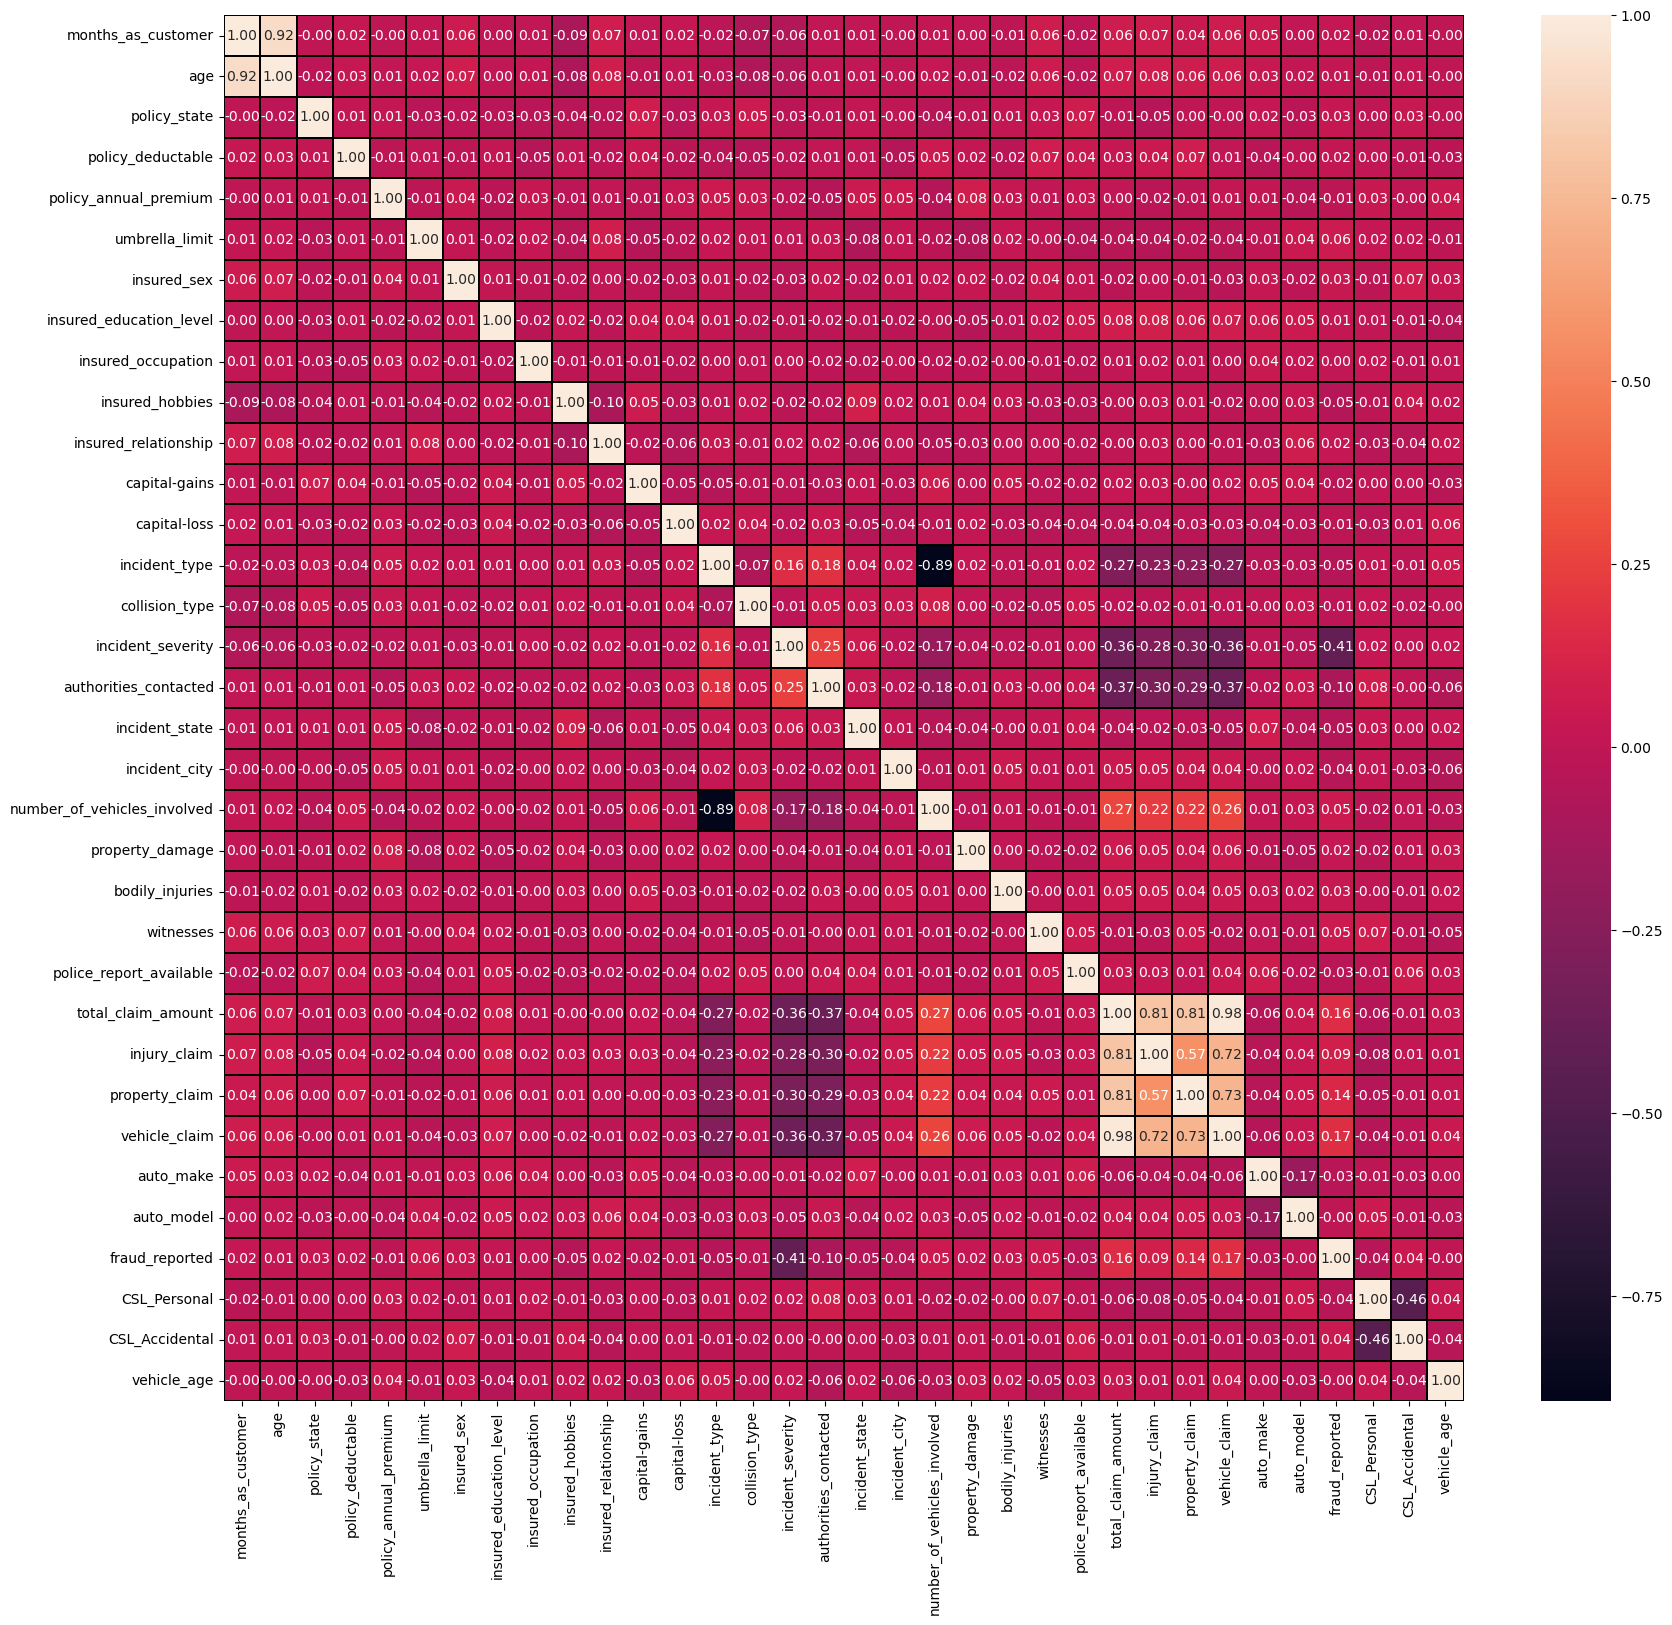

In [85]:
# Checking the correlation between features vs features and feature vs target
df_corr = df.corr()

# Visualizing the correlation using heatmap
plt.figure(figsize=(20,18))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10},linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

This heamap contains both positive and negative correlation. 

 1. total_claim_amount is postive correlated with injury_claim,property_claim,vehicle_claim.
 2. vehicle_claim is postive correlated with injury_claim, property_claim.
 3. number_of_vehicles_involved is negative correlated with incident_type.

### Correlation between feature vs target

In [86]:
df_corr['fraud_reported'].drop('fraud_reported').sort_values(ascending=False)

vehicle_claim                  0.170089
total_claim_amount             0.163370
property_claim                 0.140053
injury_claim                   0.090051
umbrella_limit                 0.058288
witnesses                      0.051046
number_of_vehicles_involved    0.048161
CSL_Accidental                 0.044555
bodily_injuries                0.034817
insured_sex                    0.032816
policy_state                   0.029573
months_as_customer             0.021373
insured_relationship           0.018903
property_damage                0.018166
policy_deductable              0.015244
age                            0.012601
insured_education_level        0.010659
insured_occupation             0.003240
auto_model                    -0.001123
vehicle_age                   -0.003893
policy_annual_premium         -0.009982
capital-loss                  -0.012011
collision_type                -0.013424
capital-gains                 -0.019449
police_report_available       -0.030820


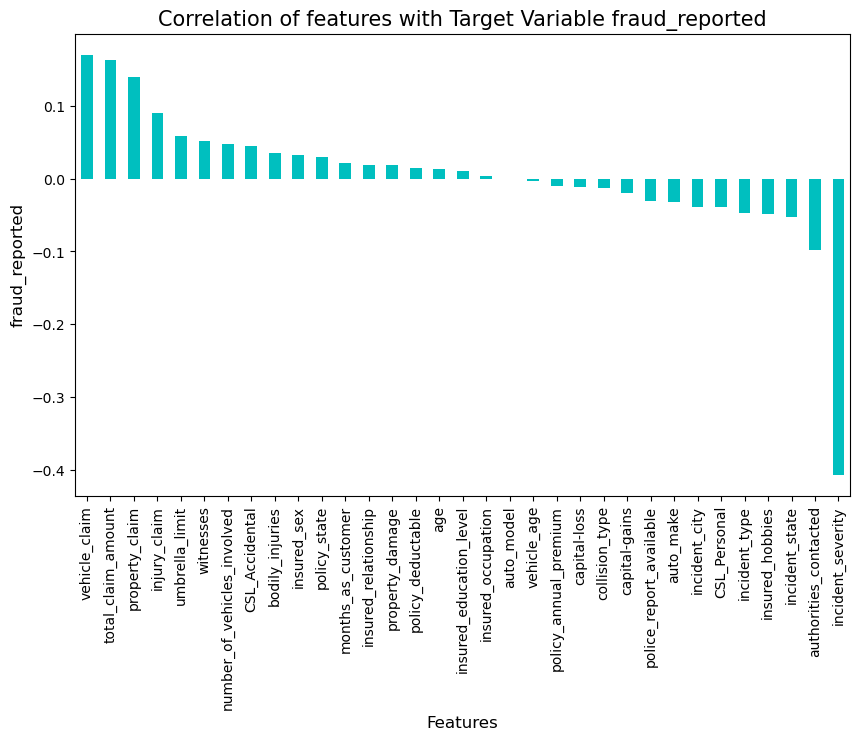

In [87]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (10,6))
df.corr()['fraud_reported'].drop(['fraud_reported']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('fraud_reported',fontsize=12)
plt.title('Correlation of features with Target Variable fraud_reported',fontsize = 15)
plt.show()

* Maximum postive correlated features are vehicle_claim,total_claim_amount,property_claim with taget variable.
* Maximum negative correlated features are incident_severit with taget variable.
* insured_occupation, auto_model, vehicle_age features are poorly or moderately correlated with target. variable.


## Sparating features and target

In [88]:
x = df.drop(columns=['fraud_reported'],axis=1)
y = df['fraud_reported']

print('Shape of X',x.shape)
print('Shape of y ',y.shape)

Shape of X (995, 33)
Shape of y  (995,)


fraud_reported
0    749
1    246
Name: count, dtype: int64


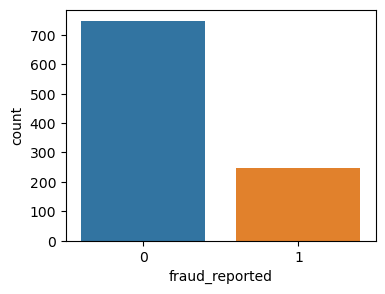

In [89]:
# Checking the count of target columns
print(y.value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x=y)
plt.show()

Here we can see that the data is not balanced, since it is classification problem we will balance the data using oversampling method.

## OverSampling

In [90]:
# Oversampling the data
from imblearn.over_sampling import SMOTE

SM = SMOTE()

x1,y1 = SM.fit_resample(x,y)

fraud_reported
1    749
0    749
Name: count, dtype: int64


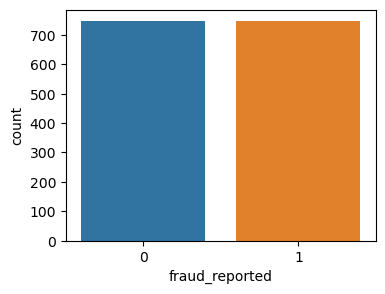

In [91]:
# Checking the count of target columns
print(y1.value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x=y1)
plt.show()

Now the data is balanced.

## Feature Scaling using Standard Scalarization

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

x1.shape

(1498, 33)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

## Checking Variance Inflation Factor (VIF)

In [93]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x1.columns
vif['VIF values'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]

vif

,Feature,VIF values
0,months_as_customer,7.115815
1,age,7.080348
2,policy_state,1.058764
3,policy_deductable,1.049238
4,policy_annual_premium,1.042797
5,umbrella_limit,1.039620
6,insured_sex,1.081223
7,insured_education_level,1.051439
8,insured_occupation,1.030237
9,insured_hobbies,1.076678


There is multicollinearity issue, so we remove high correlated columns.

In [94]:
# Drop total_claim_amount column
x1 = x1.drop(columns=['total_claim_amount'],axis=1)

In [95]:
# Checking the VIF again
vif = pd.DataFrame()
vif['Feature'] = x1.columns
vif['VIF values'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]

vif

,Feature,VIF values
0,months_as_customer,7.095828
1,age,7.070996
2,policy_state,1.058595
3,policy_deductable,1.048384
4,policy_annual_premium,1.041662
5,umbrella_limit,1.039581
6,insured_sex,1.078349
7,insured_education_level,1.051330
8,insured_occupation,1.029713
9,insured_hobbies,1.076190


There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

In [96]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [97]:
maxAccu = 0
maxRs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu*100,"at random_state", maxRs)  

Best accuracy is  86.4 at random_state 118


### Creating train test split

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=maxRs)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (1123, 32)
The shape of y_train  (1123,)
The shape of x_test   (375, 32)
The shape of y_test   (375,)


### Applying all Classification Model

In [99]:
LR  = LogisticRegression()
KNN = KNeighborsClassifier()
DT  = DecisionTreeClassifier()
ET  = ExtraTreeClassifier()
RFC = RandomForestClassifier()
BC  = BaggingClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC(probability=True)
XGB = xgb.XGBClassifier()

models = {'LogisticRegression':LR,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFC,
         'Bagging':BC,'AdaBoost':ABC,'GradientBoosting':GBC,'SVC':SVM,'XGBoost':XGB}

In [100]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    print('\n\033[1m'+'Classification ML Algorithm model is',name,'\033[0m\n')

    print('\033[1m'+'Accuracy Score :'+'\033[0m', acc_score)
    
    print('\n\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    
    print('\n\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(y_test, y_pred))
    
    print('****************************************************************************************')


Classification ML Algorithm model is LogisticRegression 

Accuracy Score : 0.864

Confusion matrix : 
 [[171  32]
 [ 19 153]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       203
           1       0.83      0.89      0.86       172

    accuracy                           0.86       375
   macro avg       0.86      0.87      0.86       375
weighted avg       0.87      0.86      0.86       375

****************************************************************************************

Classification ML Algorithm model is DecisionTree 

Accuracy Score : 0.8133333333333334

Confusion matrix : 
 [[164  39]
 [ 31 141]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       203
           1       0.78      0.82      0.80       172

    accuracy                           0.81       375
   macro avg       0.81      0.81      0.81       3

# Cross Validation

In [101]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    
    score = cross_val_score(model, x1, y1, cv =5)

    print('\n\033[1m'+'Cross Validation Score', name, ':'+'\033[0m\n')
    print("Score          :" ,score)
    print("Mean Score     :",score.mean())
    print('Accuracy Score :',acc_score)
        
    final = acc_score - score.mean()
    print('\nDifferent between Accuracy vs Cross Val Score: ',final)
    
    print('\n***********************************************************************************')


Cross Validation Score LogisticRegression :

Score          : [0.64333333 0.73666667 0.84333333 0.86622074 0.87625418]
Mean Score     : 0.7931616499442586
Accuracy Score : 0.864

Different between Accuracy vs Cross Val Score:  0.07083835005574135

***********************************************************************************

Cross Validation Score DecisionTree :

Score          : [0.76       0.77666667 0.83666667 0.88963211 0.85618729]
Mean Score     : 0.8238305462653288
Accuracy Score : 0.8293333333333334

Different between Accuracy vs Cross Val Score:  0.005502787068004555

***********************************************************************************

Cross Validation Score ExtraTree :

Score          : [0.61       0.70666667 0.75666667 0.77591973 0.76923077]
Mean Score     : 0.7236967670011147
Accuracy Score : 0.7573333333333333

Different between Accuracy vs Cross Val Score:  0.033636566332218565

************************************************************************

**We can see that DecisionTree gives less error between accuracy score and CrossValidation.**

* Score          : [0.76       0.77666667 0.83666667 0.88963211 0.85618729]
* Mean Score     : 0.8238305462653288
* Accuracy Score : 0.8293333333333334

* Different between Accuracy vs Cross Val Score:  0.005502787068004555


## Hyper Parameter Tuning : GridSearchCV

### Tune the parameter with DecisionTree model

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion' : ['gini', 'entropy'],
              'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8],
              'max_depth' : [10,20,30],
              'splitter':['best','random']
             }

GCV = GridSearchCV(estimator = DT, param_grid=param_grid)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_split=3)


Best score :  0.7675079365079365


## Final Model

In [108]:
model = GCV.best_estimator_
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('\033[1m'+' Final Model :' +'\033[0m')
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('\nConfusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

 Final Model :
Accuracy Score 0.76

Confusion matrix :
 [[154  49]
 [ 41 131]]

Classification report :
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       203
           1       0.73      0.76      0.74       172

    accuracy                           0.76       375
   macro avg       0.76      0.76      0.76       375
weighted avg       0.76      0.76      0.76       375



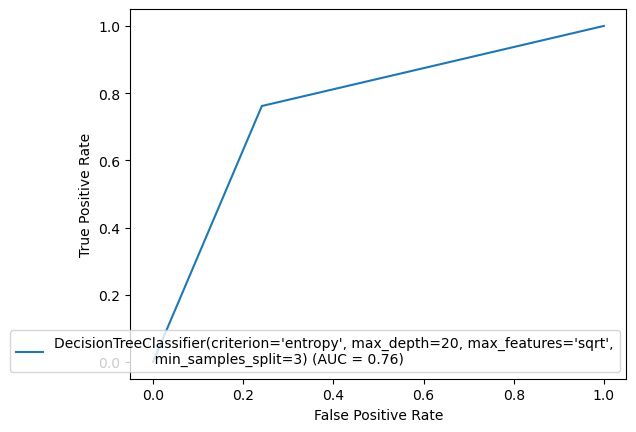

In [109]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 76%.

### Saving the model

In [110]:
import joblib
joblib.dump(model,'Insurance_Claim_Fraud_Detection.pkl')

['Insurance_Claim_Fraud_Detection.pkl']

### Predicting the saved model

In [111]:
# Let's load the saved model and get the predictions
model = joblib.load("Insurance_Claim_Fraud_Detection.pkl")

# Prediction 
prediction = model.predict(x_test)
prediction

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,